# Step [1]: Prepare libraries and data

## [1.1] Include important libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import import_ipynb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import Cleaning
# import importlib
# importlib.reload(Cleaning)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers

## [1.2] Download data

In [ ]:
# !wget 'https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI' -O 'final_data.zip'

In [ ]:
# !unzip final_data.zip

## [1.3] read data from csv file

In [ ]:
train = pd.read_csv('final_data/train.csv')
test = pd.read_csv('final_data/test.csv')
valid = pd.read_csv('final_data/valid.csv')

## [1.4] Prapere The Comparison Dictionary

In [13]:
model_comparison_table = {}

In [14]:
model_comparison_table['model_name'] = []
model_comparison_table['preprocessing_methods'] = []
model_comparison_table['accuracy'] = []

# Step [2]: Build Baseline

## [2.0] Filter data

In [7]:
def filter_data(data, col):
    data = data[(data.label == 0) | (data.label == 1) ][col].to_list()
    return np.array(data)

## [2.1] Extract Bag of Words Features

In [22]:
def generate_bag_of_words(train, valid, test):
    vectorizer = CountVectorizer()
    vectorizer.fit(train)
    train_bag = vectorizer.transform(train)
    valid_bag = vectorizer.transform(valid)
    test_bag = vectorizer.transform(test)
    return train_bag, valid_bag, test_bag

## [2.2] Train model

In [42]:
def logistic_regression(X_tr, y_tr, X_test, y_test, _C=1.0):
    model = LogisticRegression(C=_C, solver = 'liblinear', multi_class = 'ovr')
    model.fit(X_tr, y_tr) 
    score = model.score(X_test, y_test)
    return score

## [2.3] Evaluation

In [26]:
def evalute_bow():
    train_filtered = filter_data(train, 'tweet')
    valid_filtered = filter_data(valid, 'tweet')
    test_filtered = filter_data(test, 'tweet')
    x_train, x_valid, x_test = generate_bag_of_words(train_filtered, valid_filtered, test_filtered)
    y_train, y_valid, y_test = filter_data(train, 'label'), filter_data(valid, 'label'), filter_data(test, 'label'), 
    score = logistic_regression(x_train, y_train, x_test, y_test)
    return score

In [114]:
logistic_regression_acc = evalute_bow()
logistic_regression_acc

0.7765918292234082

في المثال التالي طريقة إدخال وكتابة اسم النموذج والعمليات وإدخال الدقة

In [115]:
model_comparison_table['model_name'].append("logistic regression with bag of words")
model_comparison_table['preprocessing_methods'].append("none")
model_comparison_table['accuracy'].append(logistic_regression_acc)

# Step [3]: Build model with preprocessing methods

In [68]:
def bog_model(x_train, x_valid, x_test, y_train,y_valid, y_test):
    x_bow_train, x_bow_valid, x_bow_test = generate_bag_of_words(x_train, x_valid, x_test)
    score = logistic_regression(x_bow_train, y_train, x_bow_test, y_test)
    return score

## Evaluation

In [69]:
def evaluate_bow_model(flags):
    train_filtered = filter_data(train, 'tweet')
    valid_filtered = filter_data(valid, 'tweet')
    test_filtered = filter_data(test, 'tweet')
    x_train = Cleaning.preprocess(train_filtered, flags)
    x_valid = Cleaning.preprocess(valid_filtered, flags)
    x_test = Cleaning.preprocess(test_filtered, flags)
    y_train = filter_data(train, 'label')
    y_valid = filter_data(valid, 'label')
    y_test = filter_data(test, 'label')
    score = bog_model(x_train, x_valid, x_test, y_train,y_valid, y_test)
    return score

In [71]:
score = evaluate_bow_model([0,0,0,0,0,0,0,0,0,0])
print(score)

0.7765918292234082


## remove_urls

In [72]:
score = evaluate_bow_model([1,0,0,0,0,0,0,0,0,0]) 
print(score)

0.7769598822230401


## remove_mentions

In [73]:
score = evaluate_bow_model([1,1,0,0,0,0,0,0,0,0])
print(score)

0.7718071402281929


## remove_dup_cahrs

In [74]:
score = evaluate_bow_model([1,1,1,0,0,0,0,0,0,0])
print(score)

0.7762237762237763


## replace_numbers

In [75]:
score = evaluate_bow_model([1,1,1,0,1,0,0,0,0,0])
print(score)

0.777695988222304


## remove_stop_words

In [ ]:
score = evaluate_bow_model([1,1,1,0,1,1,0,0,0,0])
print(score)

## remove_emojis

In [80]:
score = evaluate_bow_model([1,1,1,0,1,0,1,0,0,0])
print(score)

0.7773279352226721


## lemmatize

In [ ]:
score = evaluate_bow_model([1,1,1,0,1,0,1,1,0,0])
print(score)

## diacritic_removal

In [ ]:
score = evaluate_bow_model([1,1,1,0,1,0,1,1,1,0])

In [26]:
print(score)

0.784320942215679


In [116]:
model_comparison_table['model_name'].append("logistic regression with bag of words and data cleaning")
model_comparison_table['preprocessing_methods'].append("remove_urls, remove_mentions, remove_dup_cahrs, replace_numbers, remove_emojis, lemmatize, diacritic_removal")
model_comparison_table['accuracy'].append(score)

In [ ]:
cleaned_data = Cleaning.preprocess(filter_data(train, 'tweet'), [1,1,1,0,1,0,1,1,1,0])

In [ ]:
train_cleaned = cleaned_data
test_cleaned = Cleaning.preprocess(filter_data(test, 'tweet'), [1,1,1,0,1,0,1,1,1,0])

In [ ]:
valid_cleaned = Cleaning.preprocess(filter_data(valid, 'tweet'), [1,1,1,0,1,0,1,1,1,0])

## [3] TFIDF

In [359]:
def tfifd(train, test):
    tfidf = TfidfVectorizer(min_df=3, max_df=1.0, ngram_range=(1, 5), binary=True)
    features_train = tfidf.fit_transform(train)
    features_test = tfidf.transform(test)
    return features_train, features_test

## Logistic regrission model evaluation

In [360]:
def logistic_regression_evaluation(x,y):
    score = logistic_regression(x_train, y_train, x_test, y_test)
    return score

## Evaluation

In [757]:
x_train, x_test = tfifd(train_cleaned, test_cleaned)
y_train, y_test = filter_data(train, 'label'), filter_data(test, 'label')
score = logistic_regression(x_train,y_train, x_test, y_test)
print(score)

0.7887375782112624


In [758]:
model_comparison_table['model_name'].append("logistic regression with TF-IDF and data cleaning")
model_comparison_table['preprocessing_methods'].append("remove_urls, remove_mentions, remove_dup_cahrs, replace_numbers, remove_stop_words, remove_emojis, lemmatize, diacritic_removal, remove_duplicate_tweets")
model_comparison_table['accuracy'].append(score)

## [4] Random Forest Classifier

In [772]:
def RandomForestClassifier_evaluation(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(350)
    model.fit(x_train, y_train) 
    score = model.score(x_test, y_test)
    return score

In [773]:
score = RandomForestClassifier_evaluation(x_train, x_test, y_train, y_test)
score

0.7736474052263526

In [774]:
model_comparison_table['model_name'].append("RandomForestClassifier with TF-IDF and data cleaning")
model_comparison_table['preprocessing_methods'].append("remove_urls, remove_mentions, remove_dup_cahrs, replace_numbers, remove_stop_words, remove_emojis, lemmatize, diacritic_removal, remove_duplicate_tweets")
model_comparison_table['accuracy'].append(score)

## [5] CustomModel

In [495]:
x_train.shape

(8117, 24420)

In [496]:
vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

In [800]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_cleaned)
X_train = tokenizer.texts_to_sequences(train_cleaned)
X_test = tokenizer.texts_to_sequences(test_cleaned)
X_valid = tokenizer.texts_to_sequences(valid_cleaned)

In [509]:
def text_classification_model():
    # A integer input for vocab indices.
    text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
    
    x = vectorize_layer(text_input)
    
    x = layers.Embedding(max_features + 1, embedding_dim)(x)
    
    x = layers.LSTM(200, dropout=0.2, recurrent_dropout=0.2)(x)

#     x = layers.Dense(256, activation="relu")(x)
    x = layers.Dense(128, activation="relu")(x)
#     x = layers.Dropout(0.5)(x)

    predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

    model = tf.keras.Model(text_input, predictions)

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

In [510]:
def embedding_model(): 
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, 
                               weights=[embedding_matrix], 
                               input_length=maxlen, 
                               trainable=True))
    model.add(layers.GlobalMaxPool1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    model.summary()

In [511]:
def run_model(x_trian, x_valid, x_test, y_train, y_valid, y_test):
    model = text_classification_model()
    model.fit(x_train, y_train, batch_size = 64, epochs=5, validation_data = (x_valid, y_valid))
    score = model.evaluate(x_test, y_test)
    return score

In [512]:
x_train, x_test, x_valid = train_cleaned, test_cleaned, valid_cleaned
x_train , x_test, x_valid = np.array(x_train).astype('str'), np.array(x_test).astype('str'), np.array(x_valid).astype('str')
y_train, y_test, y_valid = filter_data(train, 'label'), filter_data(test, 'label'), filter_data(valid, 'label')
score = run_model(x_train, x_valid, x_test, y_train, y_valid, y_test)

Model: "functional_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text (InputLayer)            [(None, 1)]               0         
_________________________________________________________________
text_vectorization_7 (TextVe (None, 500)               0         
_________________________________________________________________
embedding_38 (Embedding)     (None, 500, 50)           405900    
_________________________________________________________________
lstm_50 (LSTM)               (None, 200)               200800    
_________________________________________________________________
dense_63 (Dense)             (None, 128)               25728     
_________________________________________________________________
predictions (Dense)          (None, 1)                 129       
Total params: 632,557
Trainable params: 632,557
Non-trainable params: 0
_______________________________________________

KeyboardInterrupt: 

In [801]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_cleaned)

X_train = tokenizer.texts_to_sequences(train_cleaned)
X_valid = tokenizer.texts_to_sequences(valid_cleaned)
X_test = tokenizer.texts_to_sequences(test_cleaned)

y_train = np.asarray(filter_data(train, 'label')).astype(np.uint)
y_test = np.asarray(filter_data(test, 'label')).astype(np.uint)
y_valid = np.asarray(filter_data(valid, 'label')).astype(np.uint)

vocab_size = len(tokenizer.word_index) + 1
vocab_size

17232

In [802]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [819]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen, trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_106 (Embedding)    (None, 200, 50)           861600    
_________________________________________________________________
global_max_pooling1d_52 (Glo (None, 50)                0         
_________________________________________________________________
dense_199 (Dense)            (None, 10)                510       
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 11        
Total params: 862,121
Trainable params: 862,121
Non-trainable params: 0
_________________________________________________________________


In [820]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Epoch 1/3
812/812 [==============================] - 6s 8ms/step - loss: 0.5736 - accuracy: 0.6894 - val_loss: 0.4850 - val_accuracy: 0.7479
Epoch 2/3
812/812 [==============================] - 6s 8ms/step - loss: 0.4076 - accuracy: 0.8085 - val_loss: 0.4261 - val_accuracy: 0.8005
Epoch 3/3
812/812 [==============================] - 7s 8ms/step - loss: 0.2896 - accuracy: 0.8798 - val_loss: 0.4190 - val_accuracy: 0.8016
Training Accuracy: 0.9379
Testing Accuracy:  0.8016


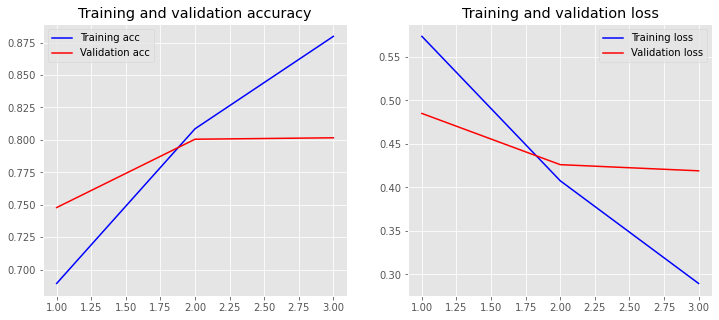

In [821]:
history = model.fit(X_train,y_train,
                    epochs=3,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [822]:
model_comparison_table['model_name'].append("Custom model")
model_comparison_table['preprocessing_methods'].append("remove_urls, remove_mentions, remove_dup_cahrs, replace_numbers, remove_stop_words, remove_emojis, lemmatize, diacritic_removal, remove_duplicate_tweets")
model_comparison_table['accuracy'].append(accuracy)

## [6] With all classes

The Custom model didn't give good accuracy

In [ ]:
train_cleaned = Cleaning.preprocess(np.array(train.tweet.to_list()), [1,1,1,0,1,0,1,1,1,0])
valid_cleaned = Cleaning.preprocess(np.array(valid.tweet.to_list()), [1,1,1,0,1,0,1,1,1,0])
test_cleaned = Cleaning.preprocess(np.array(test.tweet.to_list()), [1,1,1,0,1,0,1,1,1,0])

In [ ]:
y_train = np.array(train.label.to_list())
y_valid = np.array(valid.label.to_list())
y_test = np.array(test.label.to_list())

In [2]:
accuracy = fit_model(train_cleaned, valid_cleaned, test_cleaned, y_train, y_valid, y_test)
accuracy

0.28540371829227584


## All classes with TF-IDF

In [11]:
x_train, x_test = tfifd(train_cleaned, test_cleaned)
score = logistic_regression(x_train,y_train, x_test, y_test)
print(score)

0.5943897182922758


In [20]:
model_comparison_table['model_name'].append("with all classes")
model_comparison_table['preprocessing_methods'].append("remove_urls, remove_mentions, remove_dup_cahrs, replace_numbers, remove_stop_words, remove_emojis, lemmatize, diacritic_removal, remove_duplicate_tweets")
model_comparison_table['accuracy'].append(score)

In [25]:
import pandas as pd

df = pd.DataFrame(model_comparison_table)
df

,model_name,preprocessing_methods,accuracy
0,logistic regression with bag of words,none,0.776592
1,logistic regression with bag of words and data...,"remove_urls, remove_mentions, remove_dup_cahrs...",0.784321
2,logistic regression with TF-IDF and data cleaning,"remove_urls, remove_mentions, remove_dup_cahrs...",0.788738
3,RandomForestClassifier with TF-IDF and data cl...,"remove_urls, remove_mentions, remove_dup_cahrs...",0.773647
4,Custom model,"remove_urls, remove_mentions, remove_dup_cahrs...",0.801600
5,with all classes,"remove_urls, remove_mentions, remove_dup_cahrs...",0.594390


In [390]:
df.to_csv("shaker.csv", index=False)